# Business Analytics Class Community Detection

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import community
import igraph
from networkx.algorithms.community import centrality
import itertools
from functools import reduce
import collections
import seaborn as sns 

In [2]:
# create graph
avg_mat = pd.read_csv('./HW2_who_talks_to_whom_avg.csv')
node_no_dict = {i:str(i+1) for i in list(range(81))}
avg_node_list = list()
for i in list(range(81)):
    for j in list(range(81)):
        if avg_mat.iloc[i, j] != 0:
            avg_node_list.append([node_no_dict[i], node_no_dict[j], avg_mat.iloc[i, j]])
G = nx.Graph()
G.add_weighted_edges_from(avg_node_list)

//anaconda/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


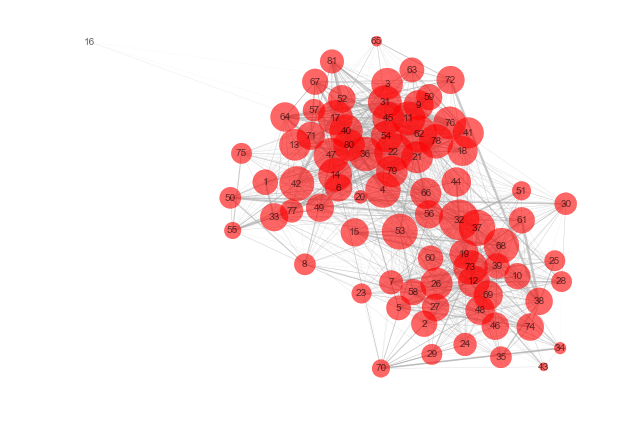

In [3]:
# rough idea of the network
k_total = 0

data_total = {'edgelist': [avg_node_list[i] for i in list(range(2057))],
              'tail': [avg_node_list[i][0] for i in list(range(2057))],
              'head': [avg_node_list[i][1] for i in list(range(2057))],
              'weight': [avg_node_list[i][2] for i in list(range(2057))],
              'num_neighbor': [len(list(G.neighbors(i[0]))) for i in avg_node_list]}
node_attr_total = DataFrame(data_total)

node_attr_total_draw = DataFrame(columns = ['edgelist', 'tail', 'head', 'weight', 'num_neighbor', 'color'])
for i in list(range(2057)):
    if node_attr_total['weight'][i] > k_total:
        node_attr_total_draw = node_attr_total_draw.append(node_attr_total.loc[i], ignore_index=True)

# try to insert the graph "BAcommunity.png" in the same folder, instead of the graph below.
nx.draw(G, 
        pos = nx.spring_layout(G, k = 0.6, iterations = 50),
        edgelist = list(node_attr_total_draw['edgelist']),
        with_labels = True,
        node_size = [(len(list(G.neighbors(i))) - 10) * 35 for i in G.nodes()],
        edge_color = 'darkgrey',
        width = [float(d['weight'] / 18 ) for (u, v, d) in G.edges(data = True)],
        alpha = 0.6,
        font_size = 10,
        arrows = False)
plt.show()

In [4]:
# Find a partition that maximizes modularity
part = community.best_partition(G)
mod = community.modularity(part, G)
print("modularity: ", mod)


# dendrogram - partition at certain level
den = community.generate_dendrogram(G)
for level in range(len(den)):
   print("partition at level", level, " is ", community.partition_at_level(den, level))
print("The least partition gives 5 communities.")

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
# 2. Plot using networkx where different community households have different colors.  
# for 1.(2)
# level 0
lv0_dict = community.partition_at_level(den, 0)
lv0_part_dict = dict()
for i in list(set(lv0_dict.values())):
    lv0_part_dict[i] = list()
    for j in list(lv0_dict.keys()):
        if lv0_dict[j] == i:
            lv0_part_dict[i].append(j)
values = [lv0_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('BA Community - Louvain Partition lv0')
plt.show()

In [ ]:
for i in list(lv0_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv0_part_dict[i])) + " nodes: " + str(lv0_part_dict[i]) + ". \n")

In [ ]:
# level 1
lv1_dict = community.partition_at_level(den, 1)
lv1_part_dict = dict()
for i in list(set(lv1_dict.values())):
    lv1_part_dict[i] = list()
    for j in list(lv1_dict.keys()):
        if lv1_dict[j] == i:
            lv1_part_dict[i].append(j)
values = [lv1_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('BA Community - Louvain Partition lv1')
plt.show()

In [ ]:
for i in list(lv1_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv1_part_dict[i])) + " nodes: " + str(lv1_part_dict[i]) + ". \n")